In [ ]:
# 📌 Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# 📌 Step 2: Load the dataset
df = pd.read_csv("/content/fraudTest.csv")  # Replace with your actual file name
df.head()


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0.0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0.0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0.0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1.371817e+09,28.812398,-80.883061,0.0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1.371817e+09,44.959148,-85.884734,0.0


In [ ]:
# Drop unnecessary columns
df = df.drop(['Unnamed: 0', 'cc_num', 'first', 'last', 'street', 'city', 'state',
              'zip', 'trans_num', 'trans_date_trans_time'], axis=1)

# Convert DOB to Age
df['dob'] = pd.to_datetime(df['dob'], errors='coerce')
df['age'] = 2024 - df['dob'].dt.year
df.drop('dob', axis=1, inplace=True)

# One-hot encode all categorical features
df = pd.get_dummies(df, columns=['category', 'gender', 'job', 'merchant'], drop_first=True)

# Scale numeric features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols_to_scale = ['amt', 'lat', 'long', 'merch_lat', 'merch_long', 'city_pop', 'age']
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])


In [ ]:
df = df.dropna(subset=['is_fraud'])


In [ ]:
# Define X and y, train-test split
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [ ]:
# Step 7: Train Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("Logistic Regression")
print(classification_report(y_test, y_pred_lr))


📌 Logistic Regression
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      8520
         1.0       0.00      0.00      0.00        37

    accuracy                           1.00      8557
   macro avg       0.50      0.50      0.50      8557
weighted avg       0.99      1.00      0.99      8557



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print("Decision Tree")
print(classification_report(y_test, y_pred_dt))


📌 Decision Tree
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      8520
         1.0       0.69      0.59      0.64        37

    accuracy                           1.00      8557
   macro avg       0.84      0.80      0.82      8557
weighted avg       1.00      1.00      1.00      8557



In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest")
print(classification_report(y_test, y_pred_rf))


📌 Random Forest
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      8520
         1.0       1.00      0.30      0.46        37

    accuracy                           1.00      8557
   macro avg       1.00      0.65      0.73      8557
weighted avg       1.00      1.00      1.00      8557



🔎 Logistic Regression


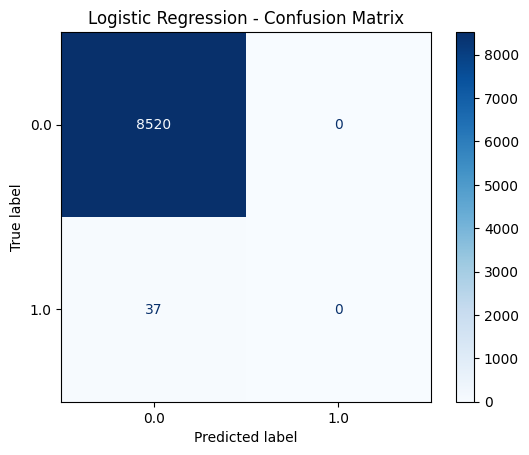

🔎 Decision Tree


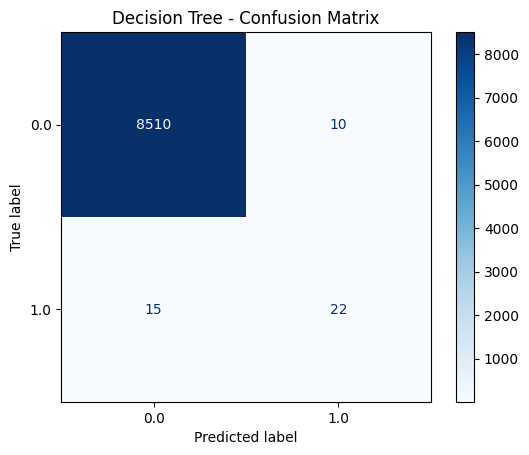

🔎 Random Forest


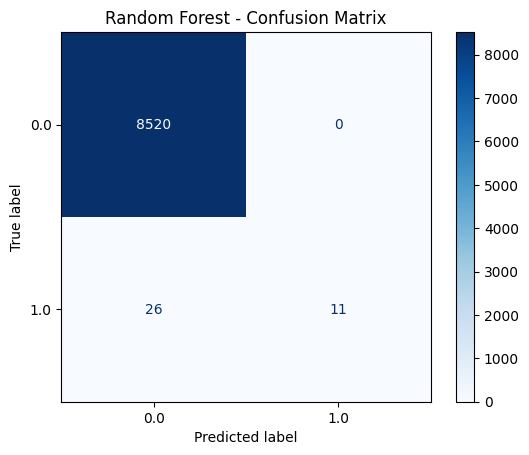

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

models = {
    "Logistic Regression": y_pred_lr,
    "Decision Tree": y_pred_dt,
    "Random Forest": y_pred_rf
}

for name, preds in models.items():
    print(f" {name}")
    ConfusionMatrixDisplay.from_predictions(y_test, preds, cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.show()
